In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2024-04-21 14:25:41.491195: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 14:25:41.563577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 14:25:41.563716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 14:25:41.566851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 14:25:41.582675: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 14:25:41.583794: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
!ls ../../

DATA.4380.Spring.2024  diabetes_predict1.csv		playground-series-s4e3
DATA4380_Spring24      diabetes_predict2.csv		zip_datasets
KidneyStoneAnalysis    diabetes_predict3.csv
Skin_Data	       diabetes_prediction_dataset.csv


In [3]:
!ls ../../Skin_Data

Cancer	Non_Cancer


In [5]:
!ls ../../Skin_Data/Cancer

Testing  Training


In [6]:
!ls ../../Skin_Data/Non_Cancer

Testing  Training


In [11]:
# delete corrupted images from cancer and Non-cancer training sets
num_skipped = 0
for folder_name in ("Cancer", "Non_Cancer"):
    folder_path = os.path.join("../../Skin_Data/Train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


In [10]:
# Count the number of corrupted images in the each of the testing sets without deleting
num_skipped = 0
for folder_name in ("Cancer", "Non_Cancer"):
    folder_path = os.path.join("../../Skin_Data/Test", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            #os.remove(fpath)

print(f"Counted {num_skipped} images.")

Counted 0 images.


Now we know that both the traininng and testing sets of each cancer and non-cancer are clean of corrupted images

In [12]:
# Generate a dataset

image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "../../Skin_Data/Train",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 84 files belonging to 2 classes.
Using 68 files for training.
Using 16 files for validation.


2024-04-21 18:24:29.492198: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


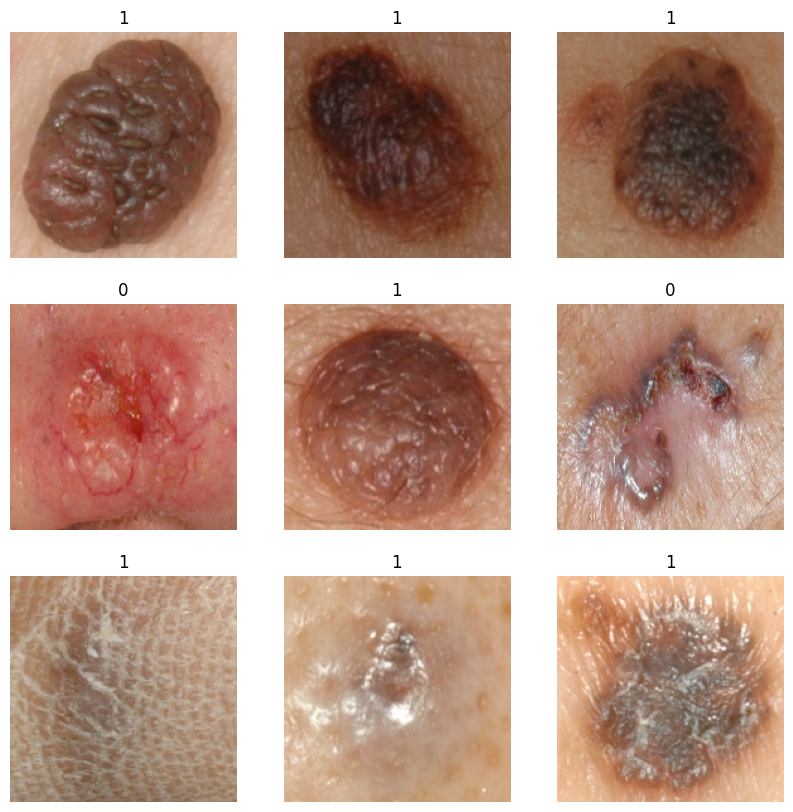

In [13]:
# Visualize the image data

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")